# Propulsion Module Examples
Solving the course examples of AC701.

## Auxiliary Functions

In [2]:
from aircraft import Aircraft
from calculation_modules.propulsion.propulsion_wrapper import PropulsionWrapper


def load_aircraft(aircraft_name):
    ''' Import Propulsion from file'''
    aircraft = Aircraft(aircraft_name)
    aircraft.load_aircraft()
    return aircraft

def set_propulsion_parameters(aircraft, mach, Pa, Po, Ta, N_2, rotation_flag, mass_flow=None):
    ''' Setting Computation Parameters'''
    propulsion_wrapper = PropulsionWrapper(aircraft)
    propulsion_wrapper.set_mach(mach)
    propulsion_wrapper.set_pressure_a(Pa)
    propulsion_wrapper.set_outlet_pressure(Po)
    propulsion_wrapper.set_temperature_a(Ta)
    propulsion_wrapper.set_compressor_rotation(N_2)
    propulsion_wrapper.set_rotation_flag(rotation_flag)
    propulsion_wrapper.set_mass_flow(mass_flow)
    return propulsion_wrapper  



# Exercise 1: Assembling the Simulator

## Example 2.1: TurboJet

### Exercise Information

 Calculate the specific thrust and specific consumption (TSFC) for a turbojet engine operating at Mach 0.85 and at 12,200 m (Pa = 18.75kPa and Ta = 216.7 K). Use the data below for efficiencies and specific heat ratios.

| Component  | Adiabatic Efficiency | Specific Heat Ratio |
|------------|----------------------|---------------------|
| diffuser   | 0,97                 | 1,40                |
| compressor | 0,85                 | 1,37                |
| combustion | 1,00                 | 1,35                |
| turbine    | 0.90                 | 1,33                |
| nozzle     | 0,98                 | 1,36                |

Operating Parameters:

| Pressure Ration in Compressor            | 30                |
|------------------------------------------|-------------------|
| Outlet temperature in combustion chamber | 1600 K            |
| Lower Heating Value of the Fuel          | 45000 kJ/kg       |
| Mean R                                   | 288,3 m^2/(s^2.K) |
| specific heat in the combustion chamber  | 1,11 kJ/(kg.K)    |



### Exercise Computation

In [2]:

''' Component Parameters'''
aircraft_name = 'TurboJet21'
aircraft = load_aircraft(aircraft_name)

''' Analysis Parameters'''
mach = 0.85
Pa = 18.75
Po = Pa
Ta = 216.7
N_2 = 1.0
rotation_flag = False


''' Results Computation '''
propulsion_wrapper = set_propulsion_parameters(aircraft, mach, Pa, Po, Ta, N_2, rotation_flag)
propulsion_wrapper.initialize()
propulsion_wrapper.compute()


''' Results '''
propulsion_results = propulsion_wrapper.get_results()
propulsion_results.print_all()

-----------------------------------------------------------------
Thermodynamic States
-----------------------------------------------------------------
T_0 :  {1: {'intake': 248.01314999999997, 'compressor': 611.5158919512793, 'combustor': 1600.0, 'turbine_compressor': 1236.4972580487206, 'nozzle_hot_air': 1236.4972580487206}}
P_0 :  {1: {'intake': 29.67483004089143, 'compressor': 593.4966008178286, 'combustor': 593.4966008178286, 'turbine_compressor': 183.734708527858, 'nozzle_hot_air': 183.734708527858}}
outlet_speed :  {1: {'nozzle_hot_air': 1094.0371639709883}}
-----------------------------------------------------------------
-----------------------------------------------------------------
Propulsion Efficiencies
-----------------------------------------------------------------
thermal_efficiency :  0.5095452996365045
propulsion_efficiency :  0.0003759271871083817
total_efficiency :  0.18544034021073103
-----------------------------------------------------------------
-----------

## Example 2.2: TurboFan

### Exercise Information

 Calculate the specific thrust and specific consumption (TSFC) for a turbofan engine operating at Mach 0.85 and at 12,200 m (Pa = 18.75kPa and Ta = 216.7 K). Use the data below for efficiencies and specific heat ratios.

| Component          | Adiabatic Efficiency | Specific Heat Ratio |
|--------------------|----------------------|---------------------|
| intake             | 0,97                 | 1,40                |
| fan                | 0,85                 | 1,40                |
| compressor         | 0,85                 | 1,37                |
| combustion         | 1,00                 | 1,35                |
| compressor turbine | 0.90                 | 1,33                |
| compressor fan     | 0.90                 | 1,33                |
| Hot air nozzle     | 0,98                 | 1,36                |
| Fan nozzle         | 0,98                 | 1,40                |

Operating Parameters:

| Outlet temperature in combustion chamber | 1600 K            |
|------------------------------------------|-------------------|
| Pressure Ration in Compressor            | 20                |
| Pressure Ration in Fan                   | 1.5               |
| Air passsage ratio                       | 5.0               |
| Lower Heating Value of the Fuel          | 45000 kJ/kg       |
| Mean R                                   | 288,3 m^2/(s^2.K) |
| specific heat in the combustion chamber  | 1,11 kJ/(kg.K)    |



### Exercise Computation

In [3]:

''' Component Parameters'''
aircraft_name = 'TurboFan22'
aircraft = load_aircraft(aircraft_name)


''' Analysis Parameters'''
mach = 0.85
Pa = 18.75
Po = Pa
Ta = 216.7
N_2 = 1.0
rotation_flag = False


''' Results Computation'''
propulsion_wrapper = set_propulsion_parameters(aircraft, mach, Pa, Po, Ta, N_2, rotation_flag)
propulsion_wrapper.initialize()
propulsion_wrapper.compute()


''' Results'''
propulsion_results = propulsion_wrapper.get_results()

propulsion_results.print_thermodynamic_states()
propulsion_results.print_performance()
propulsion_results.print_fuel_consumption()

-----------------------------------------------------------------
Thermodynamic States
-----------------------------------------------------------------
T_0 :  {1: {'intake': 248.01314999999997, 'fan': 283.85083483934795, 'compressor': 699.879407393919, 'combustor': 1600.0, 'turbine_compressor': 1183.971427445429, 'turbine_fan': 968.9453184093411, 'nozzle_hot_air': 968.9453184093411}, 2: {'intake': 248.01314999999997, 'fan': 283.85083483934795, 'nozzle_fan': 283.85083483934795}}
P_0 :  {1: {'intake': 29.67483004089143, 'fan': 44.51224506133714, 'compressor': 890.2449012267427, 'combustor': 890.2449012267427, 'turbine_compressor': 225.2805872136325, 'turbine_fan': 90.8276981066785, 'nozzle_hot_air': 90.8276981066785}, 2: {'intake': 29.67483004089143, 'fan': 44.51224506133714, 'nozzle_fan': 44.51224506133714}}
outlet_speed :  {1: {'nozzle_hot_air': 840.3352159021244}, 2: {'nozzle_fan': 350.5319446225772}}
-----------------------------------------------------------------
-----------------

## Example 2.3: TurboFan - Baseline Project Computation

### Exercise Information

Operating Engine Parameters:

| Baseline Operating Condition             |                   |
|------------------------------------------|-------------------|
| Mass Flux                                | 756 kg/s          |
| Outlet temperature in combustion chamber | 1550 K            |
| Pressure Ration in Compressor            | 17.2              |
| Pressure Ration in Booster               | 1.00              |
| Pressure Ration in Fan                   | 1.69              |
| Air bypass ratio                         | 4.69              |
| Pressure loss in combustion chamber      |  5 %              |

Operating Condition:

| Flight Operation Condition               |                   |
|------------------------------------------|-------------------|
| Flight  Mach                             | 0                 |
| Atmospheric Pressure                     | 101.63 kPa        |
| Atmospheric Temperature                  | 290 K             |
| % of maximum compressor rotation         | 1.00              |


Efficiency and specific heat ratio data:

| Component          | Adiabatic Efficiency | Specific Heat Ratio |
|--------------------|----------------------|---------------------|
| intake             | 0,97                 | 1,40                |
| fan                | 0,93                 | 1,40                |
| compressor         | 0,90                 | 1,37                |
| combustion         | 0,9995               | 1,35                |
| compressor turbine | 0.95                 | 1,33                |
| compressor fan     | 0.932                | 1,33                |
| Hot air nozzle     | 0,98                 | 1,36                |
| Fan nozzle         | 0,98                 | 1,40                |

Thermodynamic Data:

| Thermodynamic Data                       |                   |
|------------------------------------------|-------------------|
| Lower Heating Value of the Fuel          | 45000 kJ/kg       |
| Mean R                                   | 288,3 m^2/(s^2.K) |
| specific heat in the combustion chamber  | 1,11 kJ/(kg.K)    |



### Exercise Computation

In [4]:

''' Component Parameters'''
aircraft_name = 'TurboFan23'
aircraft = load_aircraft(aircraft_name)

''' Analysis Parameters'''
mach = 0
Pa = 101.63
Po = Pa
Ta = 290
N_2 = 1.0
mass_flow = 756
rotation_flag = False


''' Exercise Computation'''
propulsion_wrapper = set_propulsion_parameters(aircraft, mach, Pa, Po, Ta, N_2, rotation_flag, mass_flow)
propulsion_wrapper.initialize()
propulsion_wrapper.compute()


''' Results '''
propulsion_results = propulsion_wrapper.get_results()

propulsion_results.print_thermodynamic_states()
propulsion_results.print_performance()
propulsion_results.print_fuel_consumption()
propulsion_results.print_results()

-----------------------------------------------------------------
Thermodynamic States
-----------------------------------------------------------------
T_0 :  {1: {'intake': 290.0, 'fan': 340.4363418268446, 'compressor': 777.7719628774036, 'combustor': 1529.5241430642486, 'turbine_compressor': 1092.1885220136896, 'turbine_fan': 802.22999285116, 'nozzle_hot_air': 802.22999285116}, 2: {'intake': 290.0, 'fan': 340.4363418268446, 'nozzle_fan': 340.4363418268446}}
P_0 :  {1: {'intake': 101.63, 'fan': 171.75469999999999, 'compressor': 2954.1808399999995, 'combustor': 2806.4717979999996, 'turbine_compressor': 662.8440867781318, 'turbine_fan': 171.62394780488808, 'nozzle_hot_air': 171.62394780488808}, 2: {'intake': 101.63, 'fan': 171.75469999999999, 'nozzle_fan': 171.75469999999999}}
outlet_speed :  {1: {'nozzle_hot_air': 470.9414659224513}, 2: {'nozzle_fan': 306.1691004110632}}
-----------------------------------------------------------------
-------------------------------------------------

## Example 7.1: TurboProp - Calibrating Model

### Exercise Information

Taking the data for the PW127 engine at sea level and stationary: free turbine shaft power 2457 kW, compressor air flow 8.49 kg/s, compressor pressure ratio 15.77 and combustion chamber outlet temperature 1600K. Calibrate the engine in the performance simulation to obtain shaft power close to the reported by the manufacturer.

Operating Engine Parameters:

| Baseline Operating Condition             |                   |
|------------------------------------------|-------------------|
| Mass Flux                                | 8.49 kg/s         |
| Outlet temperature in combustion chamber | 1600 K            |
| Pressure Ration in Compressor            | 15.77             |


Operating Condition:

| Flight Operation Condition               |                   |
|------------------------------------------|-------------------|
| Flight  Mach                             | 0                 |
| Atmospheric Pressure                     | 101.30 kPa        |
| Atmospheric Temperature                  | 288.15 K          |
| % of maximum compressor rotation         | 1.00              |


Efficiency and specific heat ratio data:

| Component          | Adiabatic Efficiency | Specific Heat Ratio |
|--------------------|----------------------|---------------------|
| intake             | 0,85                 | 1,40                |
| compressor         | 0,75                 | 1,37                |
| combustion         | 1,00                 | 1,35                |
| compressor turbine | 0,90                 | 1,33                |
| free turbine       | 0,90                 | 1,33                |
| hot air nozzle     | 0,98                 | 1,36                |

Thermodynamic Data:

| Thermodynamic Data                       |                   |
|------------------------------------------|-------------------|
| Lower Heating Value of the Fuel          | 45000 kJ/kg       |
| Mean R                                   | 288,3 m^2/(s^2.K) |
| specific heat in the combustion chamber  | 1,11 kJ/(kg.K)    |

Engine Parameters varied to achieve the manufacture perfomance:

| Engine Parameters                        |                   |
|------------------------------------------|-------------------|
| Pressure Ratio in the Free Turbine       | 2.87              |
| % of maximum rotation in the compressor  | 1.00              |








### Part 1: Exercise computation
Calibrating the model to the manufacturer report with pressure ratio in the turbine equal to 2.87 and % of maximum rotation equals to 1.00.

In [5]:
''' Component Parameters'''
aircraft_name = 'TurboProp71'
aircraft = load_aircraft(aircraft_name)


''' Analysis Parameters'''
mach = 0
Pa = 101.3
Po = Pa
Ta = 288.15
mass_flow = 8.49
N_2 = 1.0
rotation_flag = False


''' Results Computation '''
propulsion_wrapper = set_propulsion_parameters(aircraft, mach, Pa, Po, Ta, N_2, rotation_flag, mass_flow)
propulsion_wrapper.initialize()
propulsion_wrapper.compute()


''' Results'''
propulsion_results = propulsion_wrapper.get_results()

propulsion_results.print_thermodynamic_states()
propulsion_results.print_performance()
propulsion_results.print_fuel_consumption()
propulsion_results.print_results()

    

-----------------------------------------------------------------
Thermodynamic States
-----------------------------------------------------------------
T_0 :  {1: {'intake': 288.15, 'compressor': 713.1564777999332, 'combustor': 1600.0, 'turbine_compressor': 1174.9935222000668, 'turbine_free': 931.5814189268193, 'nozzle': 931.5814189268193}}
P_0 :  {1: {'intake': 101.3, 'compressor': 1597.501, 'combustor': 1597.501, 'turbine_compressor': 390.1586552972163, 'turbine_free': 135.94378233352484, 'nozzle': 135.94378233352484}}
outlet_speed :  {1: {'nozzle': 385.96659273323127}}
-----------------------------------------------------------------
-----------------------------------------------------------------
Propulsion Performance
-----------------------------------------------------------------
specific_thrust :  0.3947567114064619
specific_power_turbine :  288.78854628350007
turbine_power :  2451.209819689342
fuel_air_ratio :  {1: {'combustor': 0.022774299223627482}}
----------------------

### Part 2: Comparing to Manufacturer Report

The thermodynamic power of the turbine is superior to the limit power of the gearbox.
Thus, the solution is to reduce the compressor rotation.

Engine Parameters varied to achieve the manufacture perfomance:

| Engine Parameters                        |                   |
|------------------------------------------|-------------------|
| Pressure Ratio in the Free Turbine       | 2.87              |
| % of maximum rotation in the compressor  | 0.941             |

In [6]:
''' Component Parameters'''
aircraft_name = 'TurboProp71'
aircraft = load_aircraft(aircraft_name)


''' Analysis Parameters'''
mach = 0
Pa = 101.3
Po = Pa
Ta = 288.15
mass_flow = 8.49
N_2 = 0.941
rotation_flag = True


''' Results Computation '''
propulsion_wrapper = set_propulsion_parameters(aircraft, mach, Pa, Po, Ta, N_2, rotation_flag, mass_flow)
propulsion_wrapper.initialize()
propulsion_wrapper.compute()


''' Results'''
propulsion_results = propulsion_wrapper.get_results()

propulsion_results.print_thermodynamic_states()
propulsion_results.print_performance()
propulsion_results.print_fuel_consumption()
propulsion_results.print_results()

-----------------------------------------------------------------
Thermodynamic States
-----------------------------------------------------------------
T_0 :  {1: {'intake': 288.15, 'compressor': 691.7360611249396, 'combustor': 1491.417598416, 'turbine_compressor': 1087.8315372910602, 'turbine_free': 862.4494958116022, 'nozzle': 862.4494958116022}}
P_0 :  {1: {'intake': 101.3, 'compressor': 1446.4410317353602, 'combustor': 1446.4410317353602, 'turbine_compressor': 338.0912206226813, 'turbine_free': 117.78515939605057, 'nozzle': 117.78515939605057}}
outlet_speed :  {1: {'nozzle': 268.3886945101071}}
-----------------------------------------------------------------
-----------------------------------------------------------------
Propulsion Performance
-----------------------------------------------------------------
specific_thrust :  0.27389289147418516
specific_power_turbine :  266.8049241128262
turbine_power :  2023.6601918720962
fuel_air_ratio :  {1: {'combustor': 0.020508304100233

## Example 7.2: TurboProp - Flight Condition Simulation

### Exercise Information

Now simulate the engine operating at 7,000 m and Mach 0.45, keeping other input parameters constant compared to Example 8.1. As operating strategy consider N1 = 100% and N2 = 85%.

Operating Engine Parameters:

| Baseline Operating Condition             |                   |
|------------------------------------------|-------------------|
| Mass Flux                                | 8.49 kg/s         |
| Outlet temperature in combustion chamber | 1600 K            |
| Pressure Ration in Compressor            | 15.77             |


Operating Condition:

| Flight Operation Condition               |                   |
|------------------------------------------|-------------------|
| Flight  Mach                             | 0.45              |
| Atmospheric Pressure                     | 41.00 kPa         |
| Atmospheric Temperature                  | 246.55 K          |
| % of maximum compressor rotation         | 0.85              |


Efficiency and specific heat ratio data:

| Component          | Adiabatic Efficiency | Specific Heat Ratio |
|--------------------|----------------------|---------------------|
| intake             | 0,85                 | 1,40                |
| compressor         | 0,75                 | 1,37                |
| combustion         | 1,00                 | 1,35                |
| compressor turbine | 0,90                 | 1,33                |
| free turbine       | 0,90                 | 1,33                |
| hot air nozzle     | 0,98                 | 1,36                |

Thermodynamic Data:

| Thermodynamic Data                       |                   |
|------------------------------------------|-------------------|
| Lower Heating Value of the Fuel          | 45000 kJ/kg       |
| Mean R                                   | 288,3 m^2/(s^2.K) |
| specific heat in the combustion chamber  | 1,11 kJ/(kg.K)    |








### Exercise computation
Calibrating the model to the manufacturer report with pressure ratio in the turbine equal to 2.87 and % of maximum rotation equals to 1.00.

In [7]:
''' Component Parameters'''
aircraft_name = 'TurboProp71'
aircraft = load_aircraft(aircraft_name)


''' Analysis Parameters'''
mach = 0.45
Pa = 41
Po = Pa
Ta = 246.55
mass_flow = 8.49
N_2 = 0.85
rotation_flag = True


''' Results Computation '''
propulsion_wrapper = set_propulsion_parameters(aircraft, mach, Pa, Po, Ta, N_2, rotation_flag, mass_flow)
propulsion_wrapper.initialize()
propulsion_wrapper.compute()


''' Results'''
propulsion_results = propulsion_wrapper.get_results()

propulsion_results.print_thermodynamic_states()
propulsion_results.print_performance()
propulsion_results.print_fuel_consumption()
propulsion_results.print_results()

    

-----------------------------------------------------------------
Thermodynamic States
-----------------------------------------------------------------
T_0 :  {1: {'intake': 256.535275, 'compressor': 577.2820995555925, 'combustor': 1310.6691600000001, 'turbine_compressor': 989.9223354444077, 'turbine_free': 802.8194025184226, 'nozzle': 802.8194025184226}}
P_0 :  {1: {'intake': 46.15623595536087, 'compressor': 534.5516148440526, 'combustor': 534.5516148440526, 'turbine_compressor': 144.4259777450331, 'turbine_free': 55.85120444819497, 'nozzle': 55.85120444819497}}
outlet_speed :  {1: {'nozzle': 366.9430151105784}}
-----------------------------------------------------------------
-----------------------------------------------------------------
Propulsion Performance
-----------------------------------------------------------------
specific_thrust :  0.23186141610910763
specific_power_turbine :  221.10500846162435
turbine_power :  619.3136410931413
fuel_air_ratio :  {1: {'combustor': 0.

## Example 7.3: TurboFan - Comparing to TurboProp 7.2

### Exercise Information

Simulate a turbofan engine to fulfill the same mission
of the turbofan engine in example 8.2, i.e. generate thrust of 4.26 kN at 7,000 m and flight Mach 0.45. To make the simulations we took as reference data from the PW545B engine, with a total pressure ratio of 12.5 and a passage ratio of 4.2 in the take-off condition at sea level. Some assumptions were made for the simulation as will be discussed in the following.

Operating Engine Parameters:

| Baseline Operating Condition             |                   |
|------------------------------------------|-------------------|
| Outlet temperature in combustion chamber | 1550 K            |
| Pressure Ration in Compressor            | 8.33              |
| Pressure Ration in Booster               | 1.00              |
| Pressure Ration in Fan                   | 1.50              |
| Air bypass ratio                         | 4.2               |
| Pressure loss in combustion chamber      |  0 %              |

Operating Condition:

| Flight Operation Condition               |                   |
|------------------------------------------|-------------------|
| Flight  Mach                             | 0.45              |
| Atmospheric Pressure                     | 41.00 kPa         |
| Atmospheric Temperature                  | 246.55 K          |
| % of maximum compressor rotation         | 0.85              |


Efficiency and specific heat ratio data:

| Component          | Adiabatic Efficiency | Specific Heat Ratio |
|--------------------|----------------------|---------------------|
| intake             | 0,97                 | 1,40                |
| fan                | 0,90                 | 1,40                |
| compressor         | 0,75                 | 1,37                |
| combustion         | 0,9995               | 1,35                |
| compressor turbine | 0.90                 | 1,33                |
| compressor fan     | 0.90                 | 1,33                |
| Hot air nozzle     | 0,98                 | 1,36                |
| Fan nozzle         | 0,98                 | 1,40                |

Thermodynamic Data:

| Thermodynamic Data                       |                   |
|------------------------------------------|-------------------|
| Lower Heating Value of the Fuel          | 45000 kJ/kg       |
| Mean R                                   | 288,3 m^2/(s^2.K) |
| specific heat in the combustion chamber  | 1,11 kJ/(kg.K)    |

Engine Parameters varied to achieve the TurboProp example 7.2  perfomance:

| Engine Parameters                        |                   |
|------------------------------------------|-------------------|
| Mass Flux                                | 88.42 kg/s        |



### Exercise Computation

In [8]:

''' Component Parameters'''
aircraft_name = 'TurboFan73'
aircraft = load_aircraft(aircraft_name)

''' Analysis Parameters'''
mach = 0.45
Pa = 41
Po = Pa
Ta = 246.55
mass_flow = 88.49
N_2 = 0.85
rotation_flag = True


''' Results Computation '''
propulsion_wrapper = set_propulsion_parameters(aircraft, mach, Pa, Po, Ta, N_2, rotation_flag, mass_flow)
propulsion_wrapper.initialize()
propulsion_wrapper.compute()


''' Results'''
propulsion_results = propulsion_wrapper.get_results()

propulsion_results.print_thermodynamic_states()
propulsion_results.print_performance()
propulsion_results.print_fuel_consumption()
propulsion_results.print_results()


-----------------------------------------------------------------
Thermodynamic States
-----------------------------------------------------------------
T_0 :  {1: {'intake': 256.535275, 'fan': 277.97507139773296, 'compressor': 511.81420829784184, 'combustor': 1269.7107487500002, 'turbine_compressor': 1035.8716118498915, 'turbine_fan': 905.9446857721846, 'nozzle_hot_air': 905.9446857721846}, 2: {'intake': 256.535275, 'fan': 277.97507139773296, 'nozzle_fan': 277.97507139773296}}
P_0 :  {1: {'intake': 46.91969321119418, 'fan': 60.47719058725768, 'compressor': 369.9680131721058, 'combustor': 369.9680131721058, 'turbine_compressor': 144.06104577751816, 'turbine_fan': 77.28119493670373, 'nozzle_hot_air': 77.28119493670373}, 2: {'intake': 46.91969321119418, 'fan': 60.47719058725768, 'nozzle_fan': 60.47719058725768}}
outlet_speed :  {1: {'nozzle_hot_air': 546.564211032225}, 2: {'nozzle_fan': 240.38712338098267}}
-----------------------------------------------------------------
---------------

# Exercise 2: Turbofan Engine Concept of Operation

## Part A:

## Part B:

### Auxiliary

In [3]:
def set_engine_parameters(aircraft, combustor_outlet_temperature, air_passage_ratio, compressor_pressure_ratio):
    propulsion_module = aircraft.get_propulsion_module()
    #
    fan = propulsion_module.get_component(1, 'fan')
    fan.set_air_passage_ratio(air_passage_ratio)
    #
    compressor = propulsion_module.get_component(1, 'compressor')
    compressor.set_pressure_ratio(compressor_pressure_ratio)
    #
    combustor = propulsion_module.get_component(1, 'combustor')
    combustor.set_outlet_temperature(combustor_outlet_temperature)

c:\Users\mmmon\OneDrive\Documents\3 - EMBRAER\Fase 1 - Fundamentos\1 - ITA\AC-701 - Sistemas Propulsivos\Projeto\aircraft\calculation_modules\propulsion\process\nozzle.py:24: RuntimeWarning: invalid value encountered in double_scalars
  u_s = (2*efficiency*(1/exp)*self.R_mean*inlet_temperature*(1 - (self.P_out/inlet_pressure)**exp))**(1/2)
c:\Users\mmmon\OneDrive\Documents\3 - EMBRAER\Fase 1 - Fundamentos\1 - ITA\AC-701 - Sistemas Propulsivos\Projeto\aircraft\calculation_modules\propulsion\process\nozzle.py:24: RuntimeWarning: invalid value encountered in double_scalars
  u_s = (2*efficiency*(1/exp)*self.R_mean*inlet_temperature*(1 - (self.P_out/inlet_pressure)**exp))**(1/2)
c:\Users\mmmon\OneDrive\Documents\3 - EMBRAER\Fase 1 - Fundamentos\1 - ITA\AC-701 - Sistemas Propulsivos\Projeto\aircraft\calculation_modules\propulsion\process\nozzle.py:24: RuntimeWarning: invalid value encountered in double_scalars
  u_s = (2*efficiency*(1/exp)*self.R_mean*inlet_temperature*(1 - (self.P_out/inle

[0.008654113835558674, 0.008990856105184478, 0.008923874931071227, 0.00922160783656835, 0.009679647772626018, 0.010548255948213977, 0.011016298186719205, 0.012788122139000073, 0.018008357761282418, 0.03614055781941111]
[2.692519848602882, 2.3674581605915757, 2.1602168547775262, 1.8735794292353416, 1.5791027576731236, 1.2609373906244237, 1.027928301897711, 0.7315332335473302, 0.4105627237145576, 0.15051766521555254]
[10.76923076923077, 9.692307692307692, 8.256410256410257, 7.17948717948718, 6.102564102564102, 5.0256410256410255, 3.58974358974359, 2.5128205128205128, 1.435897435897436, 0.0]


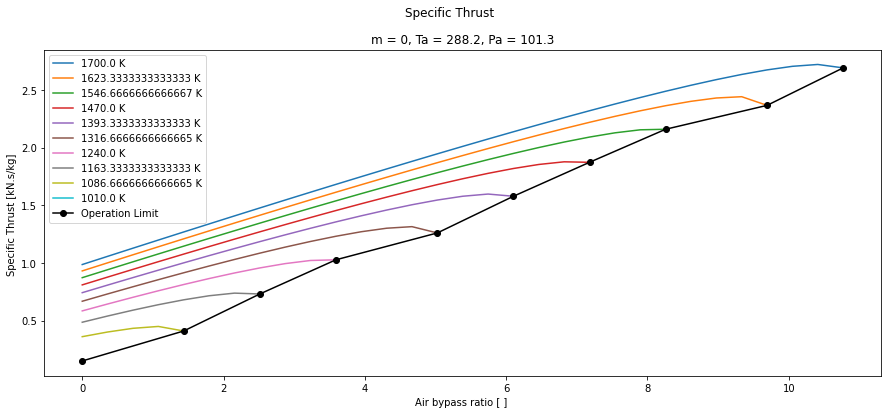

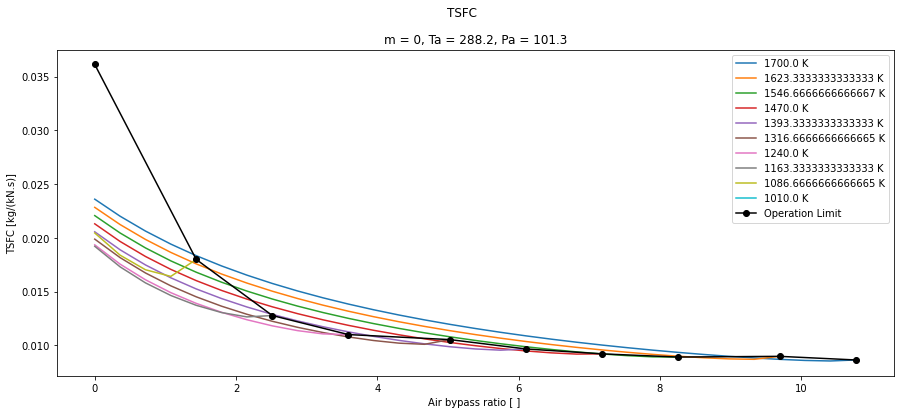

In [27]:
import numpy as np
import matplotlib.pyplot as plt


''' Component Parameters'''
aircraft_name = 'ex2_TurboFan'
aircraft = load_aircraft(aircraft_name)


''' Analysis Parameters'''
mach = 0
Pa = 101.3
Ta = 288.2
Po = Pa
N_2 = 1
list_of_air_passage_ratio = np.linspace(0, 14, 40)
list_of_combustor_outlet_temperature = np.linspace(1700, 1010, 10)
rotation_flag = False

fig1 = plt.figure(figsize=(15,6))
axis1 = fig1.add_subplot(1,1,1)
fig1.suptitle("Specific Thrust")

fig2 = plt.figure(figsize=(15,6))
axis2 = fig2.add_subplot(1,1,1)
fig2.suptitle("TSFC")

''' Iterating'''

propulsion_module = aircraft.get_propulsion_module()
fan = propulsion_module.get_component(1, 'fan')
combustor = propulsion_module.get_component(1, 'combustor')
list_of_max_TSFC_B = []
list_of_max_specific_thrust_B = []
list_of_max_air_passage_ratio = []

# iterating through the outlet combustor temperature
for combustor_outlet_temperature in list_of_combustor_outlet_temperature:
    # sets the outlet temperature of the combustor
    combustor.set_outlet_temperature(combustor_outlet_temperature)
    
    # resets the list of results
    list_of_TSFC = []
    list_of_specific_thrust = []

    
    # iterating through the pressure ratio
    for air_passage_ratio in list_of_air_passage_ratio:
        # sets the air passage ratio of the fan
        fan.set_air_passage_ratio(air_passage_ratio)

        # creates and sets the propulsion wrapper parameters
        propulsion_wrapper = set_propulsion_parameters(aircraft, mach, Pa, Po, Ta, N_2, rotation_flag)
        propulsion_wrapper.initialize()
        propulsion_wrapper.compute()
        
        # Gets the results of the propulsion wrapper computation
        propulsion_results = propulsion_wrapper.get_results()
        
        TSFC = propulsion_results.get_TSFC()
        specific_thrust = propulsion_results.get_specific_thrust()

        # appends the results to the temporary list of results
        list_of_TSFC.append(TSFC)
        list_of_specific_thrust.append(specific_thrust)

        if (TSFC > 0) and (specific_thrust > 0):
            max_TSFC_B = TSFC
            max_specific_thrust_B = specific_thrust
            max_air_passage_ratio = air_passage_ratio

    list_of_max_specific_thrust_B.append(max_specific_thrust_B)
    list_of_max_TSFC_B.append(max_TSFC_B)
    list_of_max_air_passage_ratio.append(max_air_passage_ratio)
    
    # Plot the specific thrust for the different outlet temperature in the k-th subplot
    axis1.plot(list_of_air_passage_ratio, list_of_specific_thrust, label = "{} K".format(combustor_outlet_temperature))
    axis1.set_title("m = {}, Ta = {}, Pa = {}".format(mach, Ta, Pa))
    axis1.set_ylabel("Specific Thrust [kN.s/kg] ")
    axis1.set_xlabel("Air bypass ratio [ ] ")

    # Plot the TSFC for the different outlet temperature in the k-th subplot
    axis2.plot(list_of_air_passage_ratio, list_of_TSFC, label = "{} K".format(combustor_outlet_temperature))
    axis2.set_title("m = {}, Ta = {}, Pa = {}".format(mach, Ta, Pa))
    axis2.set_ylabel("TSFC [kg/(kN.s)]")
    axis2.set_xlabel("Air bypass ratio [ ] ")

axis1.plot(list_of_max_air_passage_ratio, list_of_max_specific_thrust_B, marker='o', color='black', label='Operation Limit')
axis1.legend()
axis2.plot(list_of_max_air_passage_ratio, list_of_max_TSFC_B, marker='o', color='black', label='Operation Limit')
axis2.legend()

plt.show(block=False)

## Part C

c:\Users\mmmon\OneDrive\Documents\3 - EMBRAER\Fase 1 - Fundamentos\1 - ITA\AC-701 - Sistemas Propulsivos\Projeto\aircraft\calculation_modules\propulsion\process\nozzle.py:24: RuntimeWarning: invalid value encountered in double_scalars
  u_s = (2*efficiency*(1/exp)*self.R_mean*inlet_temperature*(1 - (self.P_out/inlet_pressure)**exp))**(1/2)
c:\Users\mmmon\OneDrive\Documents\3 - EMBRAER\Fase 1 - Fundamentos\1 - ITA\AC-701 - Sistemas Propulsivos\Projeto\aircraft\calculation_modules\propulsion\process\nozzle.py:24: RuntimeWarning: invalid value encountered in double_scalars
  u_s = (2*efficiency*(1/exp)*self.R_mean*inlet_temperature*(1 - (self.P_out/inlet_pressure)**exp))**(1/2)
c:\Users\mmmon\OneDrive\Documents\3 - EMBRAER\Fase 1 - Fundamentos\1 - ITA\AC-701 - Sistemas Propulsivos\Projeto\aircraft\calculation_modules\propulsion\process\nozzle.py:24: RuntimeWarning: invalid value encountered in double_scalars
  u_s = (2*efficiency*(1/exp)*self.R_mean*inlet_temperature*(1 - (self.P_out/inle

[0.008654113835558674, 0.008686554196175802, 0.009061295049228901, 0.009073779135354057, 0.009294658681957571, 0.009666558567298006, 0.010125181780591273, 0.011009114923396098, 0.012765578975113724, 0.01975864616489136]
[2.692519848602882, 2.7532964963448863, 2.71308670204846, 2.7899619518815744, 2.81104486053095, 2.7978614665113426, 2.7761882731959924, 2.6695609439329, 2.430981755929415, 1.6932974380751262]
[10.76923076923077, 10.76923076923077, 11.128205128205128, 11.128205128205128, 11.128205128205128, 11.128205128205128, 10.76923076923077, 10.41025641025641, 9.333333333333334, 6.82051282051282]


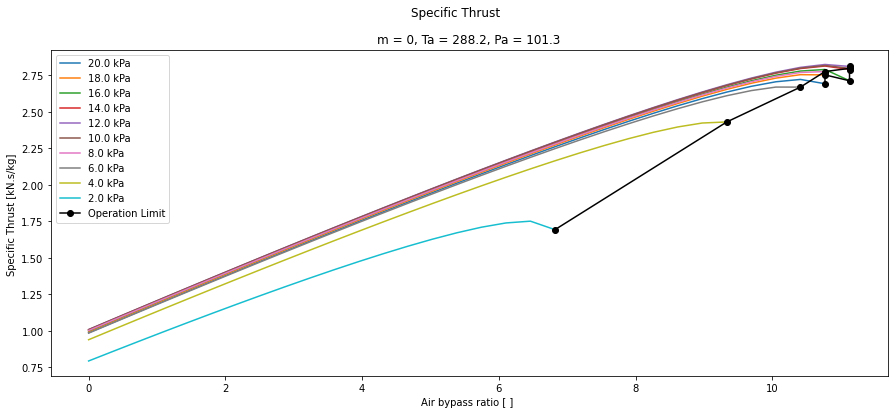

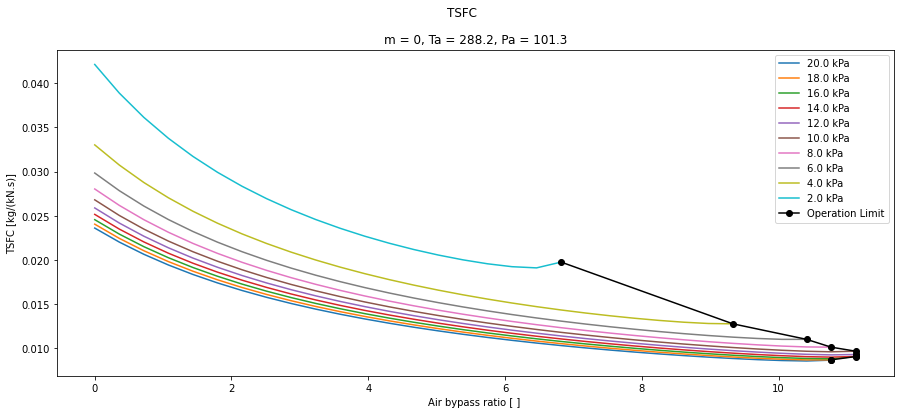

In [30]:
import numpy as np
import matplotlib.pyplot as plt


''' Component Parameters'''
aircraft_name = 'ex2_TurboFan'
aircraft = load_aircraft(aircraft_name)


''' Analysis Parameters'''
mach = 0
Pa = 101.3
Ta = 288.2
Po = Pa
N_2 = 1
list_of_air_passage_ratio = np.linspace(0, 14, 40)
list_of_compressor_pressure_ratio = np.linspace(20, 2, 10)
rotation_flag = False

fig1 = plt.figure(figsize=(15,6))
axis1 = fig1.add_subplot(1,1,1)
fig1.suptitle("Specific Thrust")

fig2 = plt.figure(figsize=(15,6))
axis2 = fig2.add_subplot(1,1,1)
fig2.suptitle("TSFC")

''' Iterating'''

propulsion_module = aircraft.get_propulsion_module()
fan = propulsion_module.get_component(1, 'fan')
compressor = propulsion_module.get_component(1, 'compressor')
list_of_max_TSFC_B = []
list_of_max_specific_thrust_B = []
list_of_max_air_passage_ratio = []

# iterating through the outlet combustor temperature
for compressor_pressure_ratio in list_of_compressor_pressure_ratio:
    # sets the outlet temperature of the combustor
    compressor.set_pressure_ratio(compressor_pressure_ratio)
    
    # resets the list of results
    list_of_TSFC = []
    list_of_specific_thrust = []

    
    # iterating through the pressure ratio
    for air_passage_ratio in list_of_air_passage_ratio:
        # sets the air passage ratio of the fan
        fan.set_air_passage_ratio(air_passage_ratio)

        # creates and sets the propulsion wrapper parameters
        propulsion_wrapper = set_propulsion_parameters(aircraft, mach, Pa, Po, Ta, N_2, rotation_flag)
        propulsion_wrapper.initialize()
        propulsion_wrapper.compute()
        
        # Gets the results of the propulsion wrapper computation
        propulsion_results = propulsion_wrapper.get_results()
        
        TSFC = propulsion_results.get_TSFC()
        specific_thrust = propulsion_results.get_specific_thrust()

        # appends the results to the temporary list of results
        list_of_TSFC.append(TSFC)
        list_of_specific_thrust.append(specific_thrust)

        if (TSFC > 0) and (specific_thrust > 0):
            max_TSFC_B = TSFC
            max_specific_thrust_B = specific_thrust
            max_air_passage_ratio = air_passage_ratio

    list_of_max_specific_thrust_B.append(max_specific_thrust_B)
    list_of_max_TSFC_B.append(max_TSFC_B)
    list_of_max_air_passage_ratio.append(max_air_passage_ratio)
    
    # Plot the specific thrust for the different outlet temperature in the k-th subplot
    axis1.plot(list_of_air_passage_ratio, list_of_specific_thrust, label = "{} kPa".format(compressor_pressure_ratio))
    axis1.set_title("m = {}, Ta = {}, Pa = {}".format(mach, Ta, Pa))
    axis1.set_ylabel("Specific Thrust [kN.s/kg] ")
    axis1.set_xlabel("Air bypass ratio [ ] ")

    # Plot the TSFC for the different outlet temperature in the k-th subplot
    axis2.plot(list_of_air_passage_ratio, list_of_TSFC, label = "{} kPa".format(compressor_pressure_ratio))
    axis2.set_title("m = {}, Ta = {}, Pa = {}".format(mach, Ta, Pa))
    axis2.set_ylabel("TSFC [kg/(kN.s)]")
    axis2.set_xlabel("Air bypass ratio [ ] ")

axis1.plot(list_of_max_air_passage_ratio, list_of_max_specific_thrust_B, marker='o', color='black', label='Operation Limit')
axis1.legend()
axis2.plot(list_of_max_air_passage_ratio, list_of_max_TSFC_B, marker='o', color='black', label='Operation Limit')
axis2.legend()
    
print(list_of_max_TSFC_B)
print(list_of_max_specific_thrust_B)
print(list_of_max_air_passage_ratio)

plt.show(block=False)

# Exercise 3: Turbofan Engine Evolution



We want to produce 100 kN at the start of takeoff (Mach = 0) at sea level (Ta =288.2K and Pa = 101.3 kPa) using turbofan engines with technologies from different decades, as shown in the table below (static design point at sea level).

## Preliminary step
Defining auxiliary functions and setting aircrafts.

### Auxiliary Functions

In [9]:
def set_engine_parameters(aircraft, combustor_outlet_temperature, air_passage_ratio, compressor_pressure_ratio, fan_pressure_ratio):
    propulsion_module = aircraft.get_propulsion_module()
    #
    fan = propulsion_module.get_component(1, 'fan')
    fan.set_air_passage_ratio(air_passage_ratio)
    fan.set_pressure_ratio(fan_pressure_ratio)
    #
    compressor = propulsion_module.get_component(1, 'compressor')
    compressor.set_pressure_ratio(compressor_pressure_ratio)
    #
    combustor = propulsion_module.get_component(1, 'combustor')
    combustor.set_outlet_temperature(combustor_outlet_temperature)


### Aircrafts Definition

In [10]:
from aircraft import Aircraft
from calculation_modules.propulsion.propulsion_wrapper import PropulsionWrapper

# 60/70's decade
''' Component Parameters'''
aircraft_name = 'ex3_TurboFan'
aircraft_60_70 = load_aircraft(aircraft_name)

combustor_outlet_temperature = 1323
air_passage_ratio = 2
compressor_pressure_ratio = 10
fan_pressure_ratio = 1.5
set_engine_parameters(aircraft_60_70, combustor_outlet_temperature, air_passage_ratio, compressor_pressure_ratio, fan_pressure_ratio)

# 70/80's decade
aircraft_name = 'ex3_TurboFan'
aircraft_70_80 = load_aircraft(aircraft_name)
combustor_outlet_temperature = 1523
air_passage_ratio = 4
compressor_pressure_ratio = 16.67
fan_pressure_ratio = 1.5
set_engine_parameters(aircraft_70_80, combustor_outlet_temperature, air_passage_ratio, compressor_pressure_ratio, fan_pressure_ratio)

# 80/90's decade
aircraft_name = 'ex3_TurboFan'
aircraft_80_90 = load_aircraft(aircraft_name)
combustor_outlet_temperature = 1623
air_passage_ratio = 5
compressor_pressure_ratio = 21.33
fan_pressure_ratio = 1.5
set_engine_parameters(aircraft_80_90, combustor_outlet_temperature, air_passage_ratio, compressor_pressure_ratio, fan_pressure_ratio)

# 90/00's decade
aircraft_name = 'ex3_TurboFan'
aircraft_90_00 = load_aircraft(aircraft_name)
combustor_outlet_temperature = 1823
air_passage_ratio = 8
compressor_pressure_ratio = 24
fan_pressure_ratio = 1.5
set_engine_parameters(aircraft_90_00, combustor_outlet_temperature, air_passage_ratio, compressor_pressure_ratio, fan_pressure_ratio)

# 00/10's decade
aircraft_name = 'ex3_TurboFan'
aircraft_00_10 = load_aircraft(aircraft_name)
combustor_outlet_temperature = 1973
air_passage_ratio = 10
compressor_pressure_ratio = 32
fan_pressure_ratio = 1.5
set_engine_parameters(aircraft_00_10, combustor_outlet_temperature, air_passage_ratio, compressor_pressure_ratio, fan_pressure_ratio)

aircraft_list = [aircraft_60_70, aircraft_70_80, aircraft_80_90, aircraft_90_00, aircraft_00_10]
aircraft_name_list = ['decade 60/70', 'decade 70/80', 'decade 80/90', 'decade 90/00', 'decade 00/10']



## Part A:
 Compare the air flow, fuel consumption, specific fuel consumption and specific thrust (performance parameters) in the static design condition at sea level

### Exercise Computation

[266.5, 306.25, 318.5, 343.5, 356.25]
[1.1263897301028851, 1.6339183129072385, 1.8856687664256002, 2.6224110487561263, 3.0893912750650667]
[0.014906852400236039, 0.011788648726760784, 0.01082541647026356, 0.009511450983476635, 0.008743287505857004]
[1.490967141742641, 1.1792827359346205, 1.0831427263010467, 0.951588648044549, 0.8744346198421601]


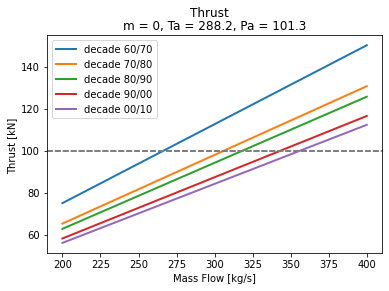

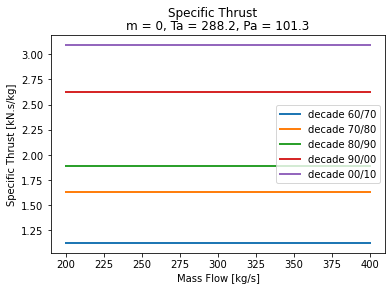

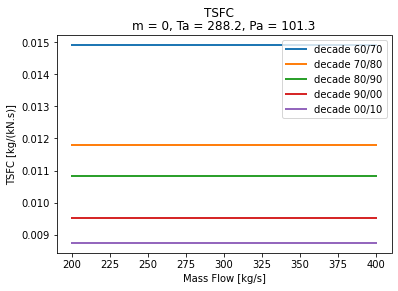

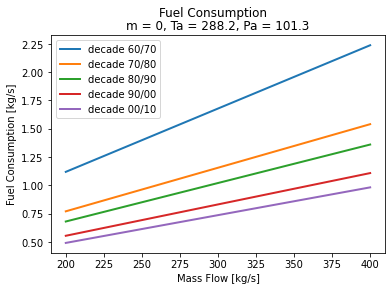

In [11]:
import numpy as np
import matplotlib.pyplot as plt

''' Analysis Parameters'''
mach = 0
Pa = 101.3
Po = Pa
Ta = 288.2
N_2 = 1
rotation_flag = False
list_of_mass_flow = np.linspace(200, 400, 801)

fig1 = plt.figure()
fig1.suptitle("Thrust")
axis1 = fig1.add_subplot(111)

fig2 = plt.figure()
fig2.suptitle("Specific Thrust")
axis2 = fig2.add_subplot(111)


fig3 = plt.figure()
fig3.suptitle("TSFC")
axis3 = fig3.add_subplot(111)

fig4 = plt.figure()
fig4.suptitle("Fuel Consumption")
axis4 = fig4.add_subplot(111)

list_of_mass_flow_100 = []
list_of_specific_thrust_100 = []
list_of_TSFC_100 = []
list_of_fuel_consumption_100 = []

for aircraft_name, aircraft in zip(aircraft_name_list, aircraft_list):
    list_of_thrust = []
    list_of_specific_thrust = []
    list_of_TSFC = []
    list_of_fuel_consumption = []
    thrust_flag = True
    for mass_flow in list_of_mass_flow:
        # creates and sets the propulsion wrapper parameters
        propulsion_wrapper = set_propulsion_parameters(aircraft, mach, Pa, Po, Ta, N_2, rotation_flag, mass_flow)
        propulsion_wrapper.initialize()
        propulsion_wrapper.compute()
        # Gets the results of the propulsion wrapper computation
        propulsion_results = propulsion_wrapper.get_results()
        # appends the results to the temporary list of results
        thrust = propulsion_results.get_thrust()
        specific_thrust = propulsion_results.get_specific_thrust()
        TSFC = propulsion_results.get_TSFC()
        fuel_consumption = propulsion_results.get_fuel_consumption()
        list_of_thrust.append(thrust)
        list_of_specific_thrust.append(specific_thrust)
        list_of_TSFC.append(TSFC)
        list_of_fuel_consumption.append(fuel_consumption)
        if thrust >= 100 and thrust_flag:
            list_of_mass_flow_100.append(mass_flow)
            list_of_specific_thrust_100.append(specific_thrust)
            list_of_TSFC_100.append(TSFC)
            list_of_fuel_consumption_100.append(fuel_consumption)
            thrust_flag = False

    
    axis1.plot(list_of_mass_flow, list_of_thrust, linewidth=2, label = aircraft_name)
    axis1.set_title("m = {}, Ta = {}, Pa = {}".format(mach, Ta, Pa))
    axis1.set_ylabel("Thrust [kN] ")
    axis1.set_xlabel("Mass Flow [kg/s]")
    axis1.axhline(100, linestyle='--', color='gray')
    axis1.legend()

    axis2.plot(list_of_mass_flow, list_of_specific_thrust, linewidth=2, label = aircraft_name)
    axis2.set_title("m = {}, Ta = {}, Pa = {}".format(mach, Ta, Pa))
    axis2.set_ylabel("Specific Thrust [kN.s/kg]")
    axis2.set_xlabel("Mass Flow [kg/s]")
    axis2.legend()

    axis3.plot(list_of_mass_flow, list_of_TSFC, linewidth=2, label = aircraft_name)
    axis3.set_title("m = {}, Ta = {}, Pa = {}".format(mach, Ta, Pa))
    axis3.set_ylabel("TSFC [kg/(kN.s)]")
    axis3.set_xlabel("Mass Flow [kg/s]")
    axis3.legend()

    axis4.plot(list_of_mass_flow, list_of_fuel_consumption, linewidth=2, label = aircraft_name)
    axis4.set_title("m = {}, Ta = {}, Pa = {}".format(mach, Ta, Pa))
    axis4.set_ylabel("Fuel Consumption [kg/s]")
    axis4.set_xlabel("Mass Flow [kg/s]")
    axis4.legend()

print(list_of_mass_flow_100)
print(list_of_specific_thrust_100)
print(list_of_TSFC_100)
print(list_of_fuel_consumption_100)




## Part B:
Still in the static condition and at sea level, vary the speed up to 70% N2 and compare how each engine performs on the performance and thrust parameters in absolute values and normalized by the 100% N2 condition

### Exercise Computation

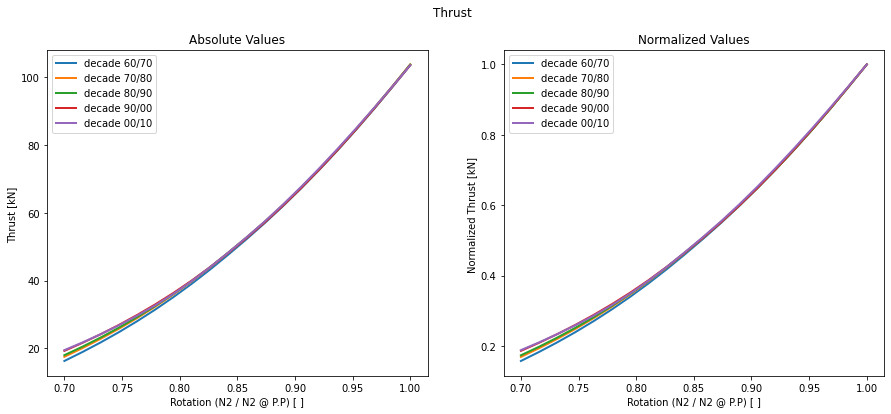

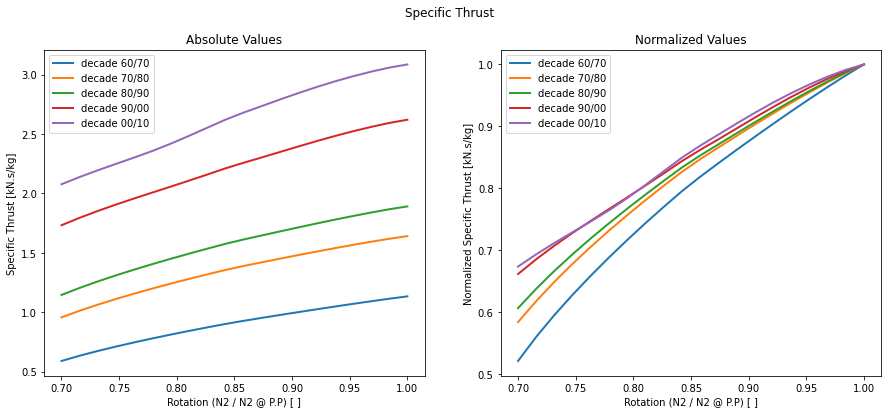

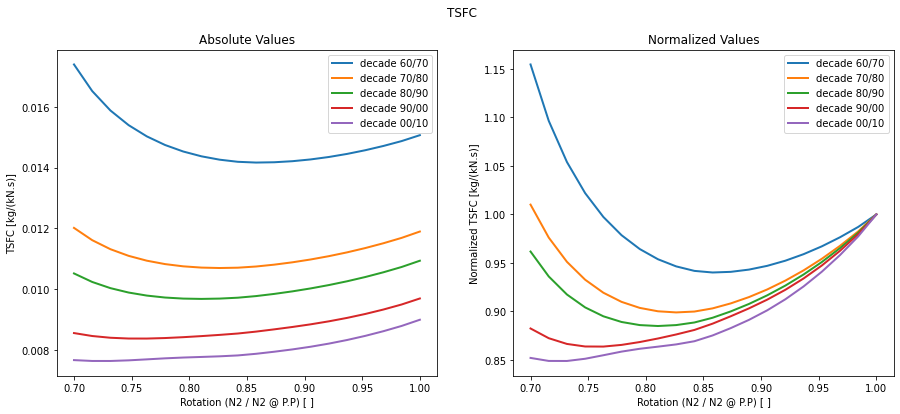

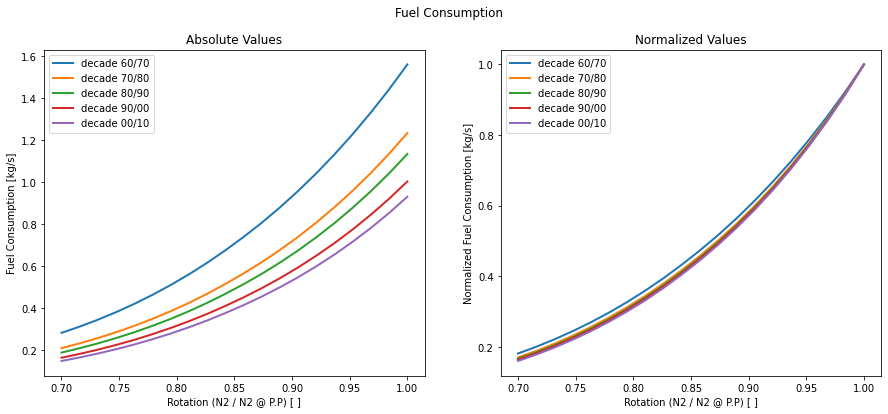

In [12]:
import numpy as np
import matplotlib.pyplot as plt

''' Analysis Parameters'''
mach = 0
Pa = 101.3
Po = Pa
Ta = 288.2
list_of_N_2 = np.linspace(0.7, 1.0, 20)
rotation_flag = True
list_of_mass_flow = [266.5, 306.25, 318.5, 343.5, 356.25]

fig1 = plt.figure(figsize=(15,6))
fig1.suptitle("Thrust")
axis1 = fig1.add_subplot(1,2,1)
axis1b = fig1.add_subplot(1,2,2)


fig2 = plt.figure(figsize=(15,6))
fig2.suptitle("Specific Thrust")
axis2 = fig2.add_subplot(1,2,1)
axis2b = fig2.add_subplot(1,2,2)


fig3 = plt.figure(figsize=(15,6))
fig3.suptitle("TSFC")
axis3 = fig3.add_subplot(1,2,1)
axis3b = fig3.add_subplot(1,2,2)

fig4 = plt.figure(figsize=(15,6))
fig4.suptitle("Fuel Consumption")
axis4 = fig4.add_subplot(1,2,1)
axis4b = fig4.add_subplot(1,2,2)

for aircraft_name, aircraft, mass_flow in zip(aircraft_name_list, aircraft_list, list_of_mass_flow):
    list_of_thrust = []
    list_of_specific_thrust = []
    list_of_TSFC = []
    list_of_fuel_consumption = []
    thrust_flag = True
    for N_2 in list_of_N_2:
        # creates and sets the propulsion wrapper parameters
        propulsion_wrapper = set_propulsion_parameters(aircraft, mach, Pa, Po, Ta, N_2, rotation_flag, mass_flow)
        propulsion_wrapper.initialize()
        propulsion_wrapper.compute()
        # Gets the results of the propulsion wrapper computation
        propulsion_results = propulsion_wrapper.get_results()
        # appends the results to the temporary list of results
        thrust = propulsion_results.get_thrust()
        specific_thrust = propulsion_results.get_specific_thrust()
        TSFC = propulsion_results.get_TSFC()
        
        fuel_consumption = propulsion_results.get_fuel_consumption()
        list_of_thrust.append(thrust)
        list_of_specific_thrust.append(specific_thrust)
        list_of_TSFC.append(TSFC)
        list_of_fuel_consumption.append(fuel_consumption)

        
    axis1.plot(list_of_N_2, list_of_thrust, linewidth=2, label = aircraft_name)
    axis1.set_title("Absolute Values")
    axis1.set_ylabel("Thrust [kN] ")
    axis1.set_xlabel("Rotation (N2 / N2 @ P.P) [ ]")
    axis1.legend()

    axis1b.plot(list_of_N_2, np.array(list_of_thrust)/thrust, linewidth=2, label = aircraft_name)
    axis1b.set_title("Normalized Values")
    axis1b.set_ylabel("Normalized Thrust [kN] ")
    axis1b.set_xlabel("Rotation (N2 / N2 @ P.P) [ ]")
    axis1b.legend()


    axis2.plot(list_of_N_2, list_of_specific_thrust, linewidth=2, label = aircraft_name)
    axis2.set_title("Absolute Values")
    axis2.set_ylabel("Specific Thrust [kN.s/kg]")
    axis2.set_xlabel("Rotation (N2 / N2 @ P.P) [ ]")
    axis2.legend()
    
    axis2b.plot(list_of_N_2, np.array(list_of_specific_thrust)/specific_thrust, linewidth=2, label = aircraft_name)
    axis2b.set_title("Normalized Values")
    axis2b.set_ylabel("Normalized Specific Thrust [kN.s/kg]")
    axis2b.set_xlabel("Rotation (N2 / N2 @ P.P) [ ]")
    axis2b.legend()

    
    
    axis3.plot(list_of_N_2, list_of_TSFC, linewidth=2, label = aircraft_name)
    axis3.set_title("Absolute Values")
    axis3.set_ylabel("TSFC [kg/(kN.s)]")
    axis3.set_xlabel("Rotation (N2 / N2 @ P.P) [ ]")
    axis3.legend()

    axis3b.plot(list_of_N_2, np.array(list_of_TSFC)/TSFC, linewidth=2, label = aircraft_name)
    axis3b.set_title("Normalized Values")
    axis3b.set_ylabel("Normalized TSFC [kg/(kN.s)]")
    axis3b.set_xlabel("Rotation (N2 / N2 @ P.P) [ ]")
    axis3b.legend()

    axis4.plot(list_of_N_2, list_of_fuel_consumption, linewidth=2, label = aircraft_name)
    axis4.set_title("Absolute Values")
    axis4.set_ylabel("Fuel Consumption [kg/s]")
    axis4.set_xlabel("Rotation (N2 / N2 @ P.P) [ ]")
    axis4.legend()

    axis4b.plot(list_of_N_2, np.array(list_of_fuel_consumption)/fuel_consumption, linewidth=2, label = aircraft_name)
    axis4b.set_title("Normalized Values")
    axis4b.set_ylabel("Normalized Fuel Consumption [kg/s]")
    axis4b.set_xlabel("Rotation (N2 / N2 @ P.P) [ ]")
    axis4b.legend()




## Part C:
Considering cruise flight at Mach 0.85 and 12,200m (Ta = 216.7K and Pa =18.75 kPa) and that the engines operate at 85% N2, calculate the previous performance parameters, adding to them the thrust generated.

### Exercise Computation

In [13]:
import numpy as np
import matplotlib.pyplot as plt

''' Analysis Parameters'''
mach = 0.85
Pa = 18.75
Po = Pa
Ta = 216.7
N_2 = 0.85
rotation_flag = True
list_of_mass_flow = [266.5, 306.25, 318.5, 343.5, 356.25]


list_of_thrust = []
list_of_specific_thrust = []
list_of_TSFC = []
list_of_fuel_consumption = []

for aircraft_name, aircraft, mass_flow in zip(aircraft_name_list, aircraft_list, list_of_mass_flow):
    # creates and sets the propulsion wrapper parameters
    propulsion_wrapper = set_propulsion_parameters(aircraft, mach, Pa, Po, Ta, N_2, rotation_flag, mass_flow)
    propulsion_wrapper.initialize()
    propulsion_wrapper.compute()
    # Gets the results of the propulsion wrapper computation
    propulsion_results = propulsion_wrapper.get_results()
    # appends the results to the temporary list of results
    thrust = propulsion_results.get_thrust()
    specific_thrust = propulsion_results.get_specific_thrust()
    TSFC = propulsion_results.get_TSFC()
    fuel_consumption = propulsion_results.get_fuel_consumption()
    
    list_of_thrust.append(thrust)
    list_of_specific_thrust.append(specific_thrust)
    list_of_TSFC.append(TSFC)
    list_of_fuel_consumption.append(fuel_consumption)

print('list_of_thrust: ', list_of_thrust)
print('list_of_specific_thrust: ', list_of_specific_thrust)
print('list_of_TSFC: ', list_of_TSFC)
print('list_of_fuel_consumption: ', list_of_fuel_consumption)


list_of_thrust:  [7.764184098599234, 6.798300639617538, 6.537774256263558, 5.958488691012664, 5.71272760056016]
list_of_specific_thrust:  [0.5786679528167853, 0.7525132105277632, 0.8399073186408031, 1.075008130217442, 1.2188732060620795]
list_of_TSFC:  [0.025924840917418136, 0.022731263509267206, 0.02155603656715025, 0.020297626901538666, 0.019434058789949776]
list_of_fuel_consumption:  [0.20128523760973266, 0.15453396325436605, 0.1409285009357908, 0.12094318034721256, 0.11102148404025487]


### Extra Exercise Computation

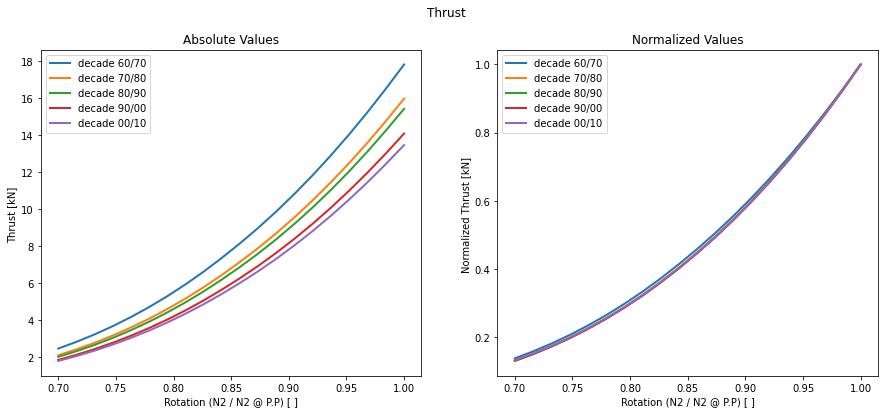

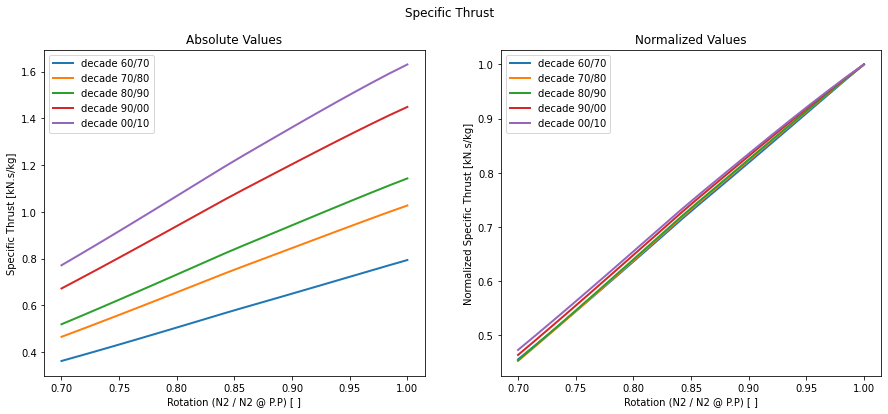

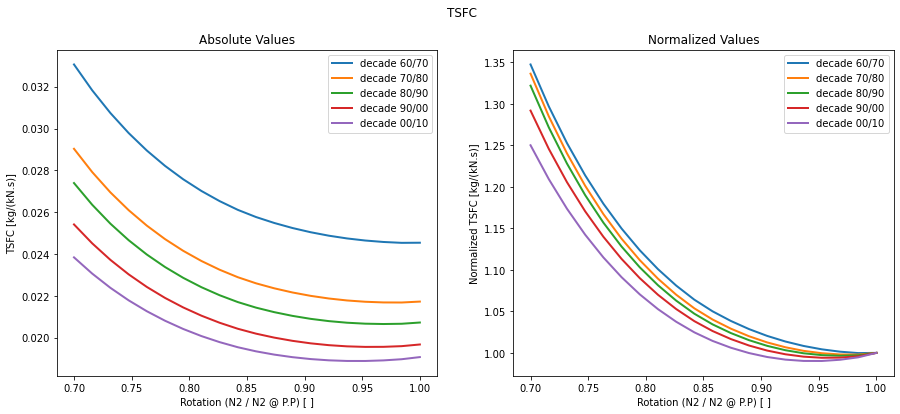

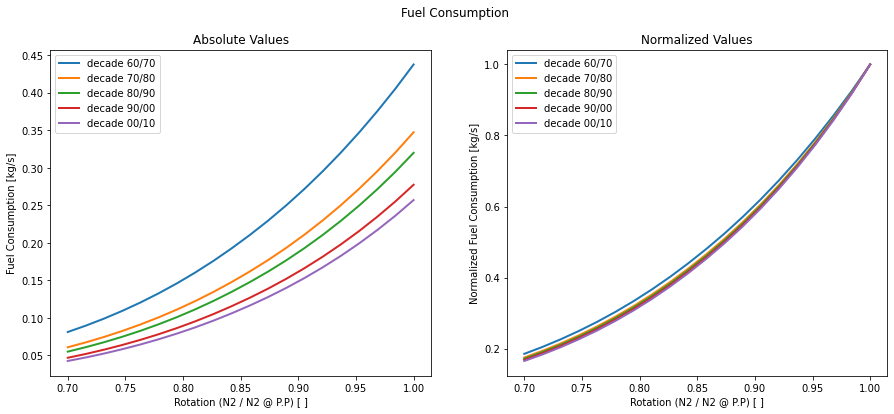

In [14]:
import matplotlib.pyplot as plt
import numpy as np

''' Analysis Parameters'''
mach = 0.85
Pa = 18.75
Po = Pa
Ta = 216.7
list_of_N_2 = np.linspace(0.7, 1.0, 20)
rotation_flag = True
list_of_mass_flow = [266.5, 306.25, 318.5, 343.5, 356.25]

fig1 = plt.figure(figsize=(15,6))
fig1.suptitle("Thrust")
axis1 = fig1.add_subplot(1,2,1)
axis1b = fig1.add_subplot(1,2,2)


fig2 = plt.figure(figsize=(15,6))
fig2.suptitle("Specific Thrust")
axis2 = fig2.add_subplot(1,2,1)
axis2b = fig2.add_subplot(1,2,2)


fig3 = plt.figure(figsize=(15,6))
fig3.suptitle("TSFC")
axis3 = fig3.add_subplot(1,2,1)
axis3b = fig3.add_subplot(1,2,2)

fig4 = plt.figure(figsize=(15,6))
fig4.suptitle("Fuel Consumption")
axis4 = fig4.add_subplot(1,2,1)
axis4b = fig4.add_subplot(1,2,2)

for aircraft_name, aircraft, mass_flow in zip(aircraft_name_list, aircraft_list, list_of_mass_flow):
    list_of_thrust = []
    list_of_specific_thrust = []
    list_of_TSFC = []
    list_of_fuel_consumption = []
    thrust_flag = True
    for N_2 in list_of_N_2:
        # creates and sets the propulsion wrapper parameters
        propulsion_wrapper = set_propulsion_parameters(aircraft, mach, Pa, Po, Ta, N_2, rotation_flag, mass_flow)
        propulsion_wrapper.initialize()
        propulsion_wrapper.compute()
        # Gets the results of the propulsion wrapper computation
        propulsion_results = propulsion_wrapper.get_results()
        # appends the results to the temporary list of results
        thrust = propulsion_results.get_thrust()
        specific_thrust = propulsion_results.get_specific_thrust()
        TSFC = propulsion_results.get_TSFC()
        
        fuel_consumption = propulsion_results.get_fuel_consumption()
        list_of_thrust.append(thrust)
        list_of_specific_thrust.append(specific_thrust)
        list_of_TSFC.append(TSFC)
        list_of_fuel_consumption.append(fuel_consumption)

        
    axis1.plot(list_of_N_2, list_of_thrust, linewidth=2, label = aircraft_name)
    axis1.set_title("Absolute Values")
    axis1.set_ylabel("Thrust [kN] ")
    axis1.set_xlabel("Rotation (N2 / N2 @ P.P) [ ]")
    axis1.legend()

    axis1b.plot(list_of_N_2, np.array(list_of_thrust)/thrust, linewidth=2, label = aircraft_name)
    axis1b.set_title("Normalized Values")
    axis1b.set_ylabel("Normalized Thrust [kN] ")
    axis1b.set_xlabel("Rotation (N2 / N2 @ P.P) [ ]")
    axis1b.legend()


    axis2.plot(list_of_N_2, list_of_specific_thrust, linewidth=2, label = aircraft_name)
    axis2.set_title("Absolute Values")
    axis2.set_ylabel("Specific Thrust [kN.s/kg]")
    axis2.set_xlabel("Rotation (N2 / N2 @ P.P) [ ]")
    axis2.legend()
    
    axis2b.plot(list_of_N_2, np.array(list_of_specific_thrust)/specific_thrust, linewidth=2, label = aircraft_name)
    axis2b.set_title("Normalized Values")
    axis2b.set_ylabel("Normalized Specific Thrust [kN.s/kg]")
    axis2b.set_xlabel("Rotation (N2 / N2 @ P.P) [ ]")
    axis2b.legend()

    
    
    axis3.plot(list_of_N_2, list_of_TSFC, linewidth=2, label = aircraft_name)
    axis3.set_title("Absolute Values")
    axis3.set_ylabel("TSFC [kg/(kN.s)]")
    axis3.set_xlabel("Rotation (N2 / N2 @ P.P) [ ]")
    axis3.legend()

    axis3b.plot(list_of_N_2, np.array(list_of_TSFC)/TSFC, linewidth=2, label = aircraft_name)
    axis3b.set_title("Normalized Values")
    axis3b.set_ylabel("Normalized TSFC [kg/(kN.s)]")
    axis3b.set_xlabel("Rotation (N2 / N2 @ P.P) [ ]")
    axis3b.legend()

    axis4.plot(list_of_N_2, list_of_fuel_consumption, linewidth=2, label = aircraft_name)
    axis4.set_title("Absolute Values")
    axis4.set_ylabel("Fuel Consumption [kg/s]")
    axis4.set_xlabel("Rotation (N2 / N2 @ P.P) [ ]")
    axis4.legend()

    axis4b.plot(list_of_N_2, np.array(list_of_fuel_consumption)/fuel_consumption, linewidth=2, label = aircraft_name)
    axis4b.set_title("Normalized Values")
    axis4b.set_ylabel("Normalized Fuel Consumption [kg/s]")
    axis4b.set_xlabel("Rotation (N2 / N2 @ P.P) [ ]")
    axis4b.legend()




# Exercise 4: Turboprop Engine Operation


Assuming a turboprop engine with the following operating characteristics at the start of take-off (Mach = 0 and maximum speed) at sea level (Ta = 288.2 K and Pa = 101.3 kPa): air flow 6.7 kg/s, compression ratio 12, total temperature at combustion chamber outlet 1400 K, plus:

| Component          | Adiabatic Efficiency | Specific Heat Ratio |
|--------------------|----------------------|---------------------|
| intake             | 0,85                 | 1,40                |
| compressor         | 0,75                 | 1,37                |
| compressor turbine | 0,90                 | 1,33                |
| free turbine       | 0,90                 | 1,33                |
| hot air nozzle     | 0,98                 | 1,36                |

Inferior calorific power of the fuel: 4500 kJ/kg

Cp isentropic free turbine: 1.16 kJ/(kg.K)

Cp free turbine: 1.11 kJ/(kg.K)


## Preliminary step
Defining auxiliary functions and setting aircrafts.

### Auxiliary Functions

In [15]:
def set_engine_parameters(aircraft, turbine_pressure_ratio):
    propulsion_module = aircraft.get_propulsion_module()
    turbine = propulsion_module.get_component(1, 'turbine_free')
    turbine.set_pressure_ratio(turbine_pressure_ratio)


## Part A: 

Calibrate the model turbo propeller engine to the data presented by the manufacturer, i.e., first calibrate the model so that in this condition the engine produces thermodynamic power of 1440 kW at the free turbine, then adjust the engine operation turbine power is equal to the maximum that can be delivered to the gearbox (mechanical power), i.e. reduction gearbox (mechanical power), i.e. 1282 kW. Describe the procedure done and adjusted parameters.

### Part 1: Exercise computation
Calibrating the model to the manufacturer report with pressure ratio in the turbine equal to 2.87 and % of maximum rotation equals to 1.00.

-----------------------------------------------------------------
Thermodynamic States
-----------------------------------------------------------------
T_0 :  {1: {'intake': 288.2, 'compressor': 655.712734579199, 'combustor': 1400.0, 'turbine_compressor': 1032.487265420801, 'turbine_free': 888.1065931060631, 'nozzle': 888.1065931060631}}
P_0 :  {1: {'intake': 101.3, 'compressor': 1215.6, 'combustor': 1215.6, 'turbine_compressor': 302.8155570751952, 'turbine_free': 153.32433269630135, 'nozzle': 153.32433269630135}}
outlet_speed :  {1: {'nozzle': 443.8395503233074}}
-----------------------------------------------------------------
-----------------------------------------------------------------
Propulsion Performance
-----------------------------------------------------------------
specific_thrust :  0.5683072960691536
specific_power_turbine :  214.44912634882536
turbine_power :  1436.2054300201194
fuel_air_ratio :  {1: {'combustor': 0.2804341020424608}}
-------------------------------

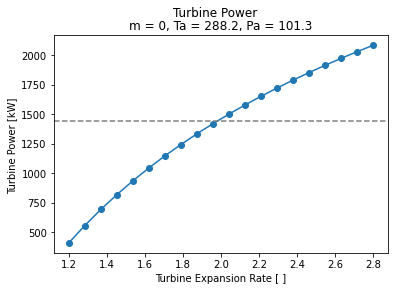

In [16]:
import numpy as np
import matplotlib.pyplot as plt

''' Component Parameters'''
aircraft_name = 'ex4_TurboProp'
aircraft = load_aircraft(aircraft_name)


''' Analysis Parameters'''
mach = 0
Pa = 101.3
Po = Pa
Ta = 288.2
mass_flow = 6.7
N_2 = 1.0
rotation_flag = False
list_of_turbine_pressure_ratio = np.linspace(1.2, 2.8, 20)
list_of_turbine_power = []

for turbine_pressure_ratio in list_of_turbine_pressure_ratio:
    set_engine_parameters(aircraft, turbine_pressure_ratio)
    propulsion_wrapper = set_propulsion_parameters(aircraft, mach, Pa, Po, Ta, N_2, rotation_flag, mass_flow)
    propulsion_wrapper.initialize()
    propulsion_wrapper.compute()
    propulsion_results = propulsion_wrapper.get_results()

    turbine_power = propulsion_results.get_turbine_power()
    
    list_of_turbine_power.append(turbine_power)

fig1 = plt.figure()
fig1.suptitle("Turbine Power")
axis1 = fig1.add_subplot(111)
axis1.plot(list_of_turbine_pressure_ratio, list_of_turbine_power, marker='o')
axis1.set_title("m = {}, Ta = {}, Pa = {}".format(mach, Ta, Pa))
axis1.set_ylabel("Turbine Power [kW] ")
axis1.set_xlabel("Turbine Expansion Rate [ ]")
axis1.axhline(1440, linestyle='--', color='gray')


'''Calibrated Model'''
turbine_pressure_ratio = 1.975
set_engine_parameters(aircraft, turbine_pressure_ratio)
propulsion_wrapper = set_propulsion_parameters(aircraft, mach, Pa, Po, Ta, N_2, rotation_flag, mass_flow)
propulsion_wrapper.initialize()
propulsion_wrapper.compute()


''' Results'''
propulsion_results = propulsion_wrapper.get_results()

propulsion_results.print_thermodynamic_states()
propulsion_results.print_performance()
# propulsion_results.print_fuel_consumption()
# propulsion_results.print_results()

    

### Part 2: Comparing to Manufacturer Report

The thermodynamic power of the turbine is superior to the limit power of the gearbox.
Thus, the solution is to reduce the compressor rotation.

Engine Parameters varied to achieve the manufacture perfomance:

| Engine Parameters                        |                   |
|------------------------------------------|-------------------|
| Pressure Ratio in the Free Turbine       | 1.975             |
| % of maximum rotation in the compressor  | 0.963             |

-----------------------------------------------------------------
Thermodynamic States
-----------------------------------------------------------------
T_0 :  {1: {'intake': 288.2, 'compressor': 643.6911909805336, 'combustor': 1346.0733432860002, 'turbine_compressor': 990.5821523054665, 'turbine_free': 850.941360486626, 'nozzle': 850.941360486626}}
P_0 :  {1: {'intake': 101.3, 'compressor': 1145.1666209600382, 'combustor': 1145.1666209600382, 'turbine_compressor': 280.4582788793729, 'turbine_free': 141.1548258250185, 'nozzle': 141.1548258250185}}
outlet_speed :  {1: {'nozzle': 390.79949722707136}}
-----------------------------------------------------------------
-----------------------------------------------------------------
Propulsion Performance
-----------------------------------------------------------------
specific_thrust :  0.4923083425618101
specific_power_turbine :  204.05793667618968
turbine_power :  1281.0527791075497
fuel_air_ratio :  {1: {'combustor': 0.2597466118943282

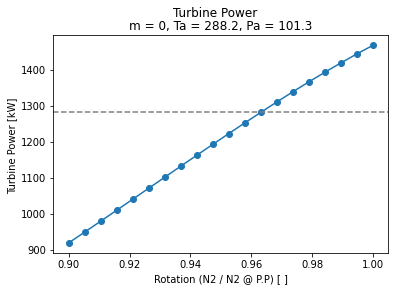

In [17]:
import numpy as np
import matplotlib.pyplot as plt

''' Component Parameters'''
aircraft_name = 'ex4_TurboProp'
aircraft = load_aircraft(aircraft_name)


''' Analysis Parameters'''
mach = 0
Pa = 101.3
Ta = 288.2
Po = Pa
mass_flow = 6.7
list_of_N_2 = np.linspace(0.9, 1.0, 20)
rotation_flag = True

list_of_turbine_power = []

for N_2 in list_of_N_2:
    propulsion_wrapper = set_propulsion_parameters(aircraft, mach, Pa, Po, Ta, N_2, rotation_flag, mass_flow)
    propulsion_wrapper.initialize()
    propulsion_wrapper.compute()
    propulsion_results = propulsion_wrapper.get_results()

    turbine_power = propulsion_results.get_turbine_power()
    
    list_of_turbine_power.append(turbine_power)

fig1 = plt.figure()
fig1.suptitle("Turbine Power")
axis1 = fig1.add_subplot(111)
axis1.plot(list_of_N_2, list_of_turbine_power, marker='o')
axis1.set_title("m = {}, Ta = {}, Pa = {}".format(mach, Ta, Pa))
axis1.set_ylabel("Turbine Power [kW] ")
axis1.set_xlabel("Rotation (N2 / N2 @ P.P) [ ]")
axis1.axhline(1282, linestyle='--', color='gray')

'''Calibrated Model'''
N_2 = 0.963
propulsion_wrapper = set_propulsion_parameters(aircraft, mach, Pa, Po, Ta, N_2, rotation_flag, mass_flow)
propulsion_wrapper.initialize()
propulsion_wrapper.compute()


''' Results'''
propulsion_results = propulsion_wrapper.get_results()

propulsion_results.print_thermodynamic_states()
propulsion_results.print_performance()
propulsion_results.print_fuel_consumption()
propulsion_results.print_results()

##  Part B:
 Starting from an ambient temperature of 288.2 K increase this value until the motor reach the flat-rating point, i.e., construct for this motor the diagram that the thermodynamic and mechanical power with the temperature at the combustion chamber combustion chamber and the ambient temperature at takeoff (see slide 209 of the course material). Also present the results for gas generator shaft rotation shaft speed (%N2), shaft specific consumption (BSFC), fuel consumption and inter-turbine temperature (TET). Comment on the results

## Part C:

 For operation at an altitude of 7000 m (Pa = 45 kPa and Ta = 246.55 K) and three flight flight speed conditions, Mach 0.25, 0.35 and 0.45, vary the speed of the gas generator between 65% and 100% of the maximum rated value. Present the behavior of the following parameters: thrust produced by the propeller, the nozzle and the total shaft specific consumption (BSFC), equivalent specific consumption (EBSFC), thrust-based specific consumption (TSFC) and fuel consumption. Note: adopt for all cases gearbox power ratio 0.98 and propeller efficiency 0,85.


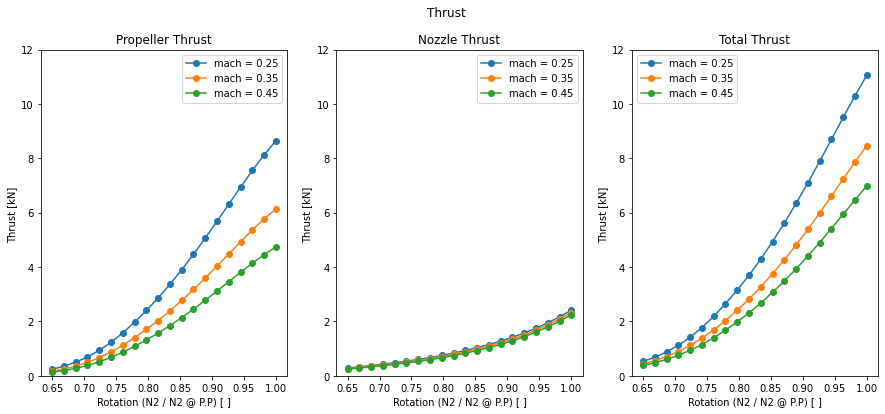

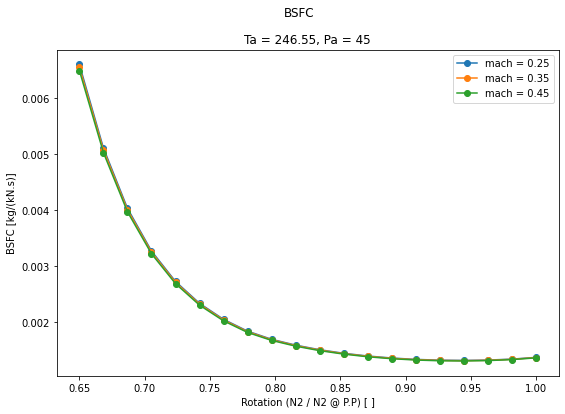

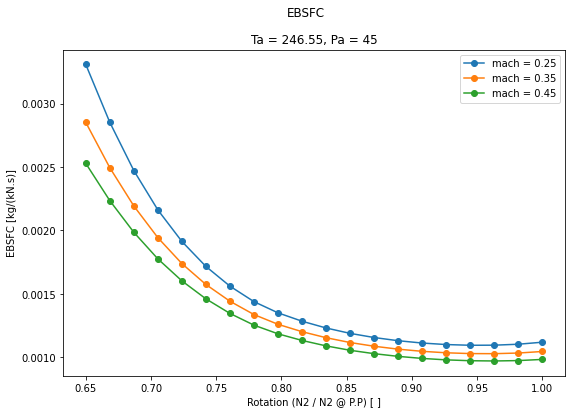

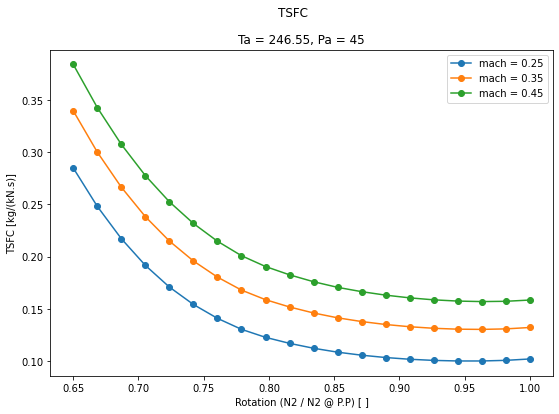

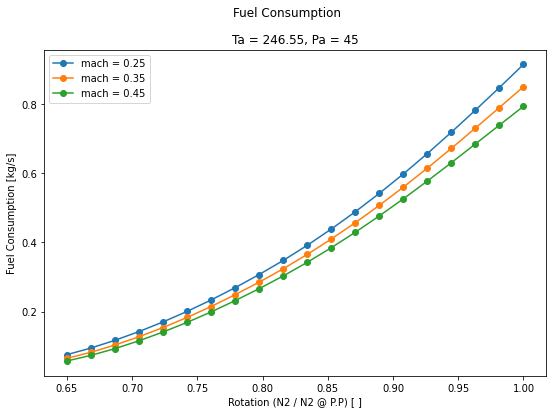

In [18]:
import numpy as np
import matplotlib.pyplot as plt

''' Component Parameters'''
aircraft_name = 'ex4_TurboProp'
aircraft = load_aircraft(aircraft_name)


''' Analysis Parameters'''
list_of_mach = [0.25, 0.35, 0.45]
Pa = 45
Po = Pa
Ta = 246.55
mass_flow = 6.7
list_of_N_2 = np.linspace(0.65, 1.0, 20)
rotation_flag = True

list_of_turbine_power = []


fig1 = plt.figure(figsize=(15,6))
fig1.suptitle("Thrust")

fig2 = plt.figure(figsize=(9,6))
fig2.suptitle("BSFC")

fig3 = plt.figure(figsize=(9,6))
fig3.suptitle("EBSFC")

fig4 = plt.figure(figsize=(9,6))
fig4.suptitle("TSFC")

fig5 = plt.figure(figsize=(9,6))
fig5.suptitle("Fuel Consumption")

axis1a = fig1.add_subplot(1,3,1)
axis1b = fig1.add_subplot(1,3,2)
axis1c = fig1.add_subplot(1,3,3)
axis2 = fig2.add_subplot(1,1,1)
axis3 = fig3.add_subplot(1,1,1)
axis4 = fig4.add_subplot(1,1,1)
axis5 = fig5.add_subplot(1,1,1)

for k, mach in enumerate(list_of_mach):
    # resets the list of results
    list_of_propeller_thrust = []
    list_of_nozzle_thrust = []
    list_of_total_thrust = []
    list_of_BSFC = []
    list_of_EBSFC = []
    list_of_TSFC = []
    list_of_fuel_consumption = []
    
    # subplot for specific thrust for the k-th condition of flight (mach, Pa, Ta)
    # axis1 = fig1.add_subplot(1,3,k+1)
    # axis2 = fig2.add_subplot(1,3,k+1)
    # axis3 = fig3.add_subplot(1,3,k+1)
    # axis4 = fig4.add_subplot(1,3,k+1)
    # axis5 = fig5.add_subplot(1,3,k+1)

    # iterating through the outlet combustor temperature
    for N_2 in list_of_N_2:
        # creates and sets the propulsion wrapper parameters
        propulsion_wrapper = set_propulsion_parameters(aircraft, mach, Pa, Po, Ta, N_2, rotation_flag, mass_flow)
        propulsion_wrapper.initialize()
        propulsion_wrapper.compute()
        
        # Gets the results of the propulsion wrapper computation
        propulsion_results = propulsion_wrapper.get_results()
        
        # appends the results to the temporary list of results
        list_of_propeller_thrust.append(propulsion_results.get_propeller_thrust())
        list_of_nozzle_thrust.append(propulsion_results.get_nozzle_thrust())
        list_of_total_thrust.append(propulsion_results.get_thrust())
        
        list_of_BSFC.append(propulsion_results.get_BSFC())
        list_of_EBSFC.append(propulsion_results.get_EBSFC())
        list_of_TSFC.append(propulsion_results.get_TSFC())
        list_of_fuel_consumption.append(propulsion_results.get_fuel_consumption())

        
    # Plot the specific thrust for the different outlet temperature in the k-th subplot
    axis1a.plot(list_of_N_2, list_of_propeller_thrust, marker='o', label = "mach = {}".format(mach))
    axis1b.plot(list_of_N_2, list_of_nozzle_thrust, marker='o', label = "mach = {}".format(mach))
    axis1c.plot(list_of_N_2, list_of_total_thrust, marker='o', label = "mach = {}".format(mach))
    axis1a.set_ylim([0, 12])
    axis1b.set_ylim([0, 12])
    axis1c.set_ylim([0, 12])
    axis1a.set_title("Propeller Thrust")
    axis1b.set_title("Nozzle Thrust")
    axis1c.set_title("Total Thrust")
    axis1a.set_ylabel("Thrust [kN] ")
    axis1a.set_xlabel("Rotation (N2 / N2 @ P.P) [ ]")
    axis1b.set_ylabel("Thrust [kN] ")
    axis1b.set_xlabel("Rotation (N2 / N2 @ P.P) [ ]")
    axis1c.set_ylabel("Thrust [kN] ")
    axis1c.set_xlabel("Rotation (N2 / N2 @ P.P) [ ]")
    axis1a.legend()
    axis1b.legend()
    axis1c.legend()

    # Plot the BSFC for the different outlet temperature in the k-th subplot
    axis2.plot(list_of_N_2, list_of_BSFC, marker='o', label = "mach = {}".format(mach))
    axis2.set_title("Ta = {}, Pa = {}".format(Ta, Pa))
    axis2.set_ylabel("BSFC [kg/(kN.s)]")
    axis2.set_xlabel("Rotation (N2 / N2 @ P.P) [ ]")
    axis2.legend()
    
    # Plot the EBSFC for the different outlet temperature in the k-th subplot
    axis3.plot(list_of_N_2, list_of_EBSFC, marker='o', label = "mach = {}".format(mach))
    axis3.set_title("Ta = {}, Pa = {}".format(Ta, Pa))
    axis3.set_ylabel("EBSFC [kg/(kN.s)]")
    axis3.set_xlabel("Rotation (N2 / N2 @ P.P) [ ]")
    axis3.legend()
    
    # Plot the EBSFC for the different outlet temperature in the k-th subplot
    axis4.plot(list_of_N_2, list_of_TSFC, marker='o', label = "mach = {}".format(mach))
    axis4.set_title("Ta = {}, Pa = {}".format(Ta, Pa))
    axis4.set_ylabel("TSFC [kg/(kN.s)]")
    axis4.set_xlabel("Rotation (N2 / N2 @ P.P) [ ]")
    axis4.legend()
    
    # Plot the thermal efficiency for the different outlet temperature in the k-th subplot
    axis5.plot(list_of_N_2, list_of_fuel_consumption, marker='o', label = "mach = {}".format(mach))
    axis5.set_title("Ta = {}, Pa = {}".format(Ta, Pa))
    axis5.set_ylabel("Fuel Consumption [kg/s]")
    axis5.set_xlabel("Rotation (N2 / N2 @ P.P) [ ]")
    axis5.legend()


plt.show(block=False)